<a href="https://colab.research.google.com/github/Premjit1/EEMAIL-CAMPAIGN-EFFECTIVENESS/blob/main/EMAIL_CAMPAIGN_EFFECTIVENESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing data files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/data_email_campaign.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
#exploratory data analysis
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [ ]:
df.describe

<bound method NDFrame.describe of                 Email_ID  Email_Type  Subject_Hotness_Score  \
0      EMA00081000034500           1                    2.2   
1      EMA00081000045360           2                    2.1   
2      EMA00081000066290           2                    0.1   
3      EMA00081000076560           1                    3.0   
4      EMA00081000109720           1                    0.0   
...                  ...         ...                    ...   
68348  EMA00089995974500           2                    0.4   
68349  EMA00089998225300           1                    1.3   
68350  EMA00089998436500           1                    2.2   
68351  EMA00089999168800           1                    0.4   
68352  EMA00089999316900           1                    1.5   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
0                      2                 E                    2   
1                      1               NaN                    2   
2       

In [ ]:
df.shape

(68353, 12)

In [ ]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
#checking for duplicate value
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
#checking for null values
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [ ]:
#categorical data analysis
df1 = df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
df1.drop('Word_Count',axis=1,inplace=True)
df1.head()

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0
2,EMA00081000066290,2,1,B,3,2,1
3,EMA00081000076560,1,2,E,2,2,0
4,EMA00081000109720,1,2,C,3,2,0


In [ ]:
df2 = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in df1.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [df1[c].unique()]
    tmp['Total Count'] = len(list(df1[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(df1[c].nunique())
    tmp['Missing Value'] = df1.isnull().sum()
    tmp['Missing %'] = (df1.isnull().sum()/ len(df1)).round(3)*100
    df2 = df2.append(tmp)
    
df2

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,NaN,NaN
0,Email_Type,"[1, 2]",2,2,NaN,NaN
0,Email_Source_Type,"[2, 1]",2,2,NaN,NaN
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,NaN,NaN
0,Email_Campaign_Type,"[2, 3, 1]",3,3,NaN,NaN
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,NaN,NaN
0,Email_Status,"[0, 1, 2]",3,3,NaN,NaN


we observed
customer location has 17 percent missing values
categorical variables have no missing values
Email_Type and Email_Source_Type have 2 categories.

Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

In [ ]:
#relationship between dependent and independent variable
df1.drop('Email_ID',axis=1,inplace=True)

In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")


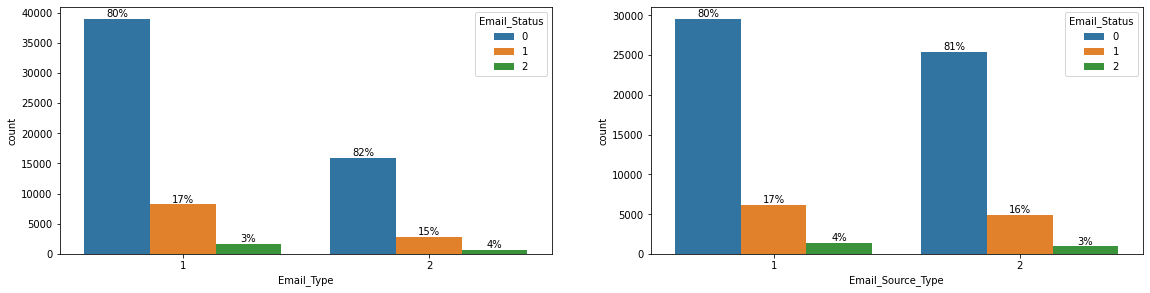

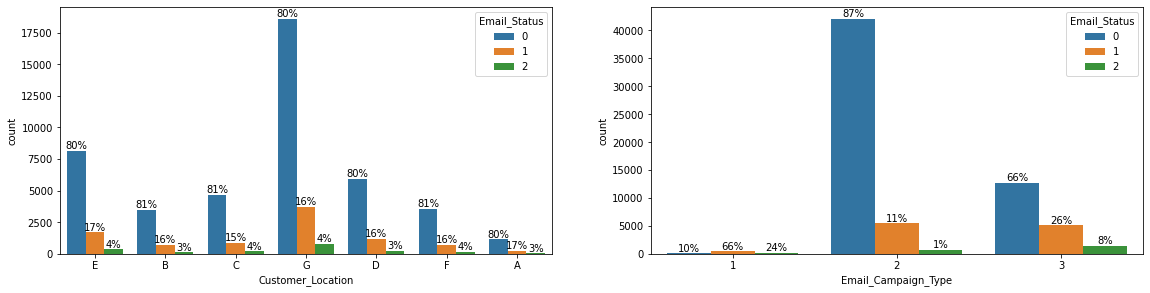

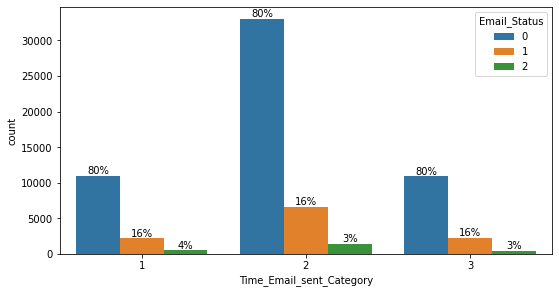

<Figure size 2160x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(df1.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df1, x=c,hue='Email_Status' ,ax = ax1)
            barPerc(df1,c,ax1)            
    ix = ix +1
    if ix == 3: 
        fig = plt.figure(figsize = (30,10))
        ix =1

we observed from the graph that the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend . For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.

In [ ]:
#analysis of non categorical data
df3 = df.select_dtypes(include =['float']).copy()
df3['Word_Count'] = df.loc[df3.index, 'Word_Count'].copy()
df3.head()

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504
2,0.1,36.0,5.0,0.0,962
3,3.0,25.0,16.0,0.0,610
4,0.0,18.0,4.0,0.0,947


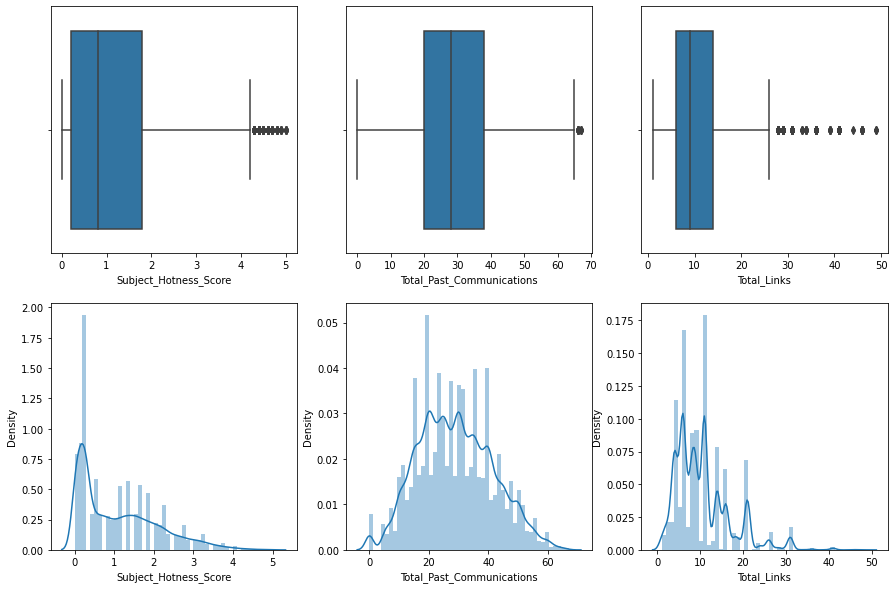

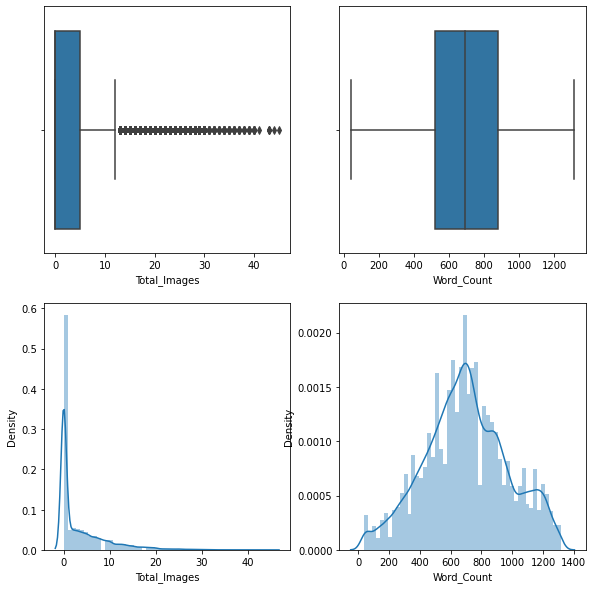

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df3.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = df3, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(df3[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [ ]:
df3['Email_Status'] = df.loc[df3.index, 'Email_Status'].copy()

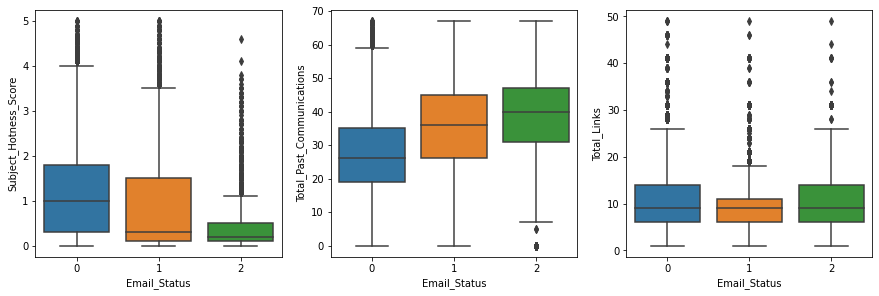

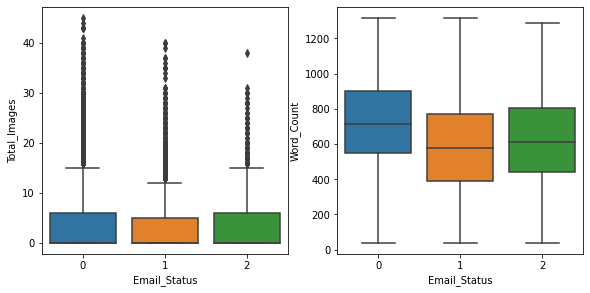

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df3.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=df3, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

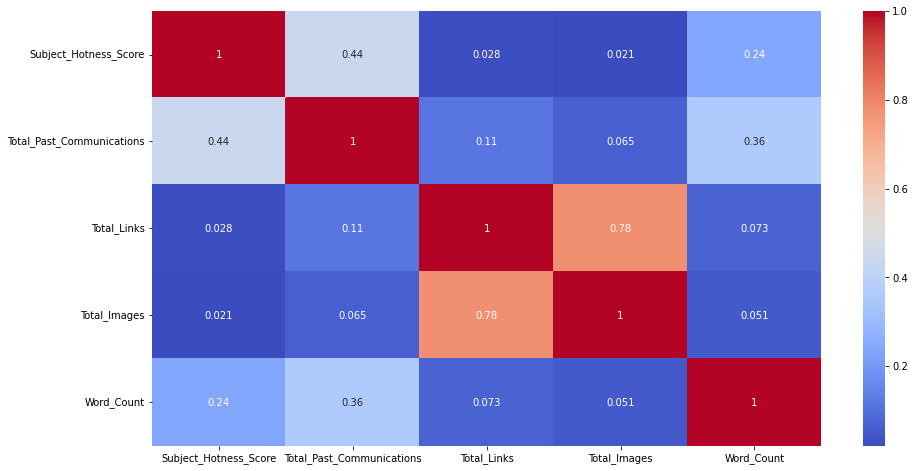

In [ ]:
#correlation analysis
plt.figure(figsize=(15,8))
correlation = df3.drop('Email_Status',axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df3.corr

<bound method DataFrame.corr of        Subject_Hotness_Score  Total_Past_Communications  Total_Links  \
0                        2.2                       33.0          8.0   
1                        2.1                       15.0          5.0   
2                        0.1                       36.0          5.0   
3                        3.0                       25.0         16.0   
4                        0.0                       18.0          4.0   
...                      ...                        ...          ...   
68348                    0.4                       22.0         16.0   
68349                    1.3                       40.0         31.0   
68350                    2.2                       33.0          9.0   
68351                    0.4                       50.0         14.0   
68352                    1.5                       20.0          6.0   

       Total_Images  Word_Count  Email_Status  
0               0.0         440             0  
1      

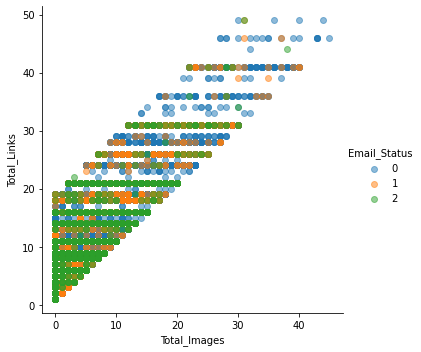

In [ ]:
sns.lmplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=df, fit_reg=False, scatter_kws={'alpha':0.5})

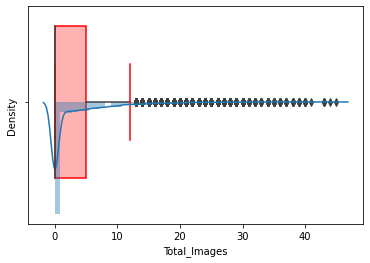

In [ ]:
ax=sns.boxplot(df3['Total_Images'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(df3['Total_Images'])

In [ ]:
#Finding number of data having 0 images
img_cnt_0=df3[df3['Total_Images']==0].count()['Total_Images']
#Total number of non nan data
total=df3['Total_Images'].count()
#finding percentage
pcnt_img_0=(img_cnt_0/total)*100
print("Percentage of data having Total_Images Zero is = ",pcnt_img_0)

Percentage of data having Total_Images Zero is =  52.58263843061971


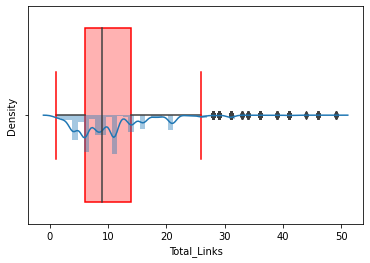

In [ ]:
ax=sns.boxplot(df3['Total_Links'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(df3['Total_Links'])

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

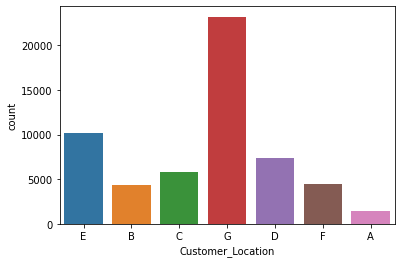

In [ ]:
#Visualizing Customer_Location
sns.countplot(df['Customer_Location'])